In [12]:
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))

In [13]:
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [15]:
def pos_tagging(text):
    words=word_tokenize(text)
    words=[w for w in words if w not in stop_words]
    tags=[]
    for word in words:
        POS={}
        x=nltk.pos_tag([word])
        POS[x[0][0]]=str(x[0][1])
        tags.append(POS)
    return tags

In [16]:
def label_texts(text):
    labels=[]
    nlp=spacy.load('en_core_web_sm')
    doc=nlp(text)
    print(doc.ents)
    for ent in doc.ents:
        labels.append({ent.text:ent.label_})
    return labels

In [17]:
def label_texts(text):
    labels=[]
    nlp=spacy.load('en_core_web_sm')
    doc=nlp(text)
    print(doc.ents)
    for ent in doc.ents:
        labels.append({ent.text:ent.label_})
    return labels

In [18]:
train_data = pd.read_csv('sentiment_train.csv')
train_data.head(5)

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


In [19]:
train_data = pd.read_csv('sentiment_train.csv')
train_data.head(5)

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  5668 non-null   object
 1   label     5668 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 88.7+ KB


In [21]:
import numpy as np
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
   stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
   non_stop_words = [word for word in stemmed_words if word not in stop_words]
   return non_stop_words

In [22]:
count_vectorizer =  CountVectorizer(analyzer=stemmed_words,stop_words= stop_words, max_features= 1000)
feature_vector =  count_vectorizer.fit(train_data.sentence)
train_ds_features =  count_vectorizer.fit_transform(train_data.sentence)
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]

C:\Users\my pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:538: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
C:\Users\my pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,features,counts
280,harri,1685
520,potter,1685
105,code,1617
142,da,1615
917,vinci,1615
404,mountain,1591
80,brokeback,1591
373,love,1514
777,suck,1191
922,wa,942


In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, train_data.label, 
                                                     test_size = 0.3, random_state = 30)

In [24]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [25]:
test_ds_predicted = nb_clf.predict(test_x.toarray())

In [26]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       734
           1       0.98      0.99      0.98       967

    accuracy                           0.98      1701
   macro avg       0.98      0.98      0.98      1701
weighted avg       0.98      0.98      0.98      1701



<AxesSubplot:>

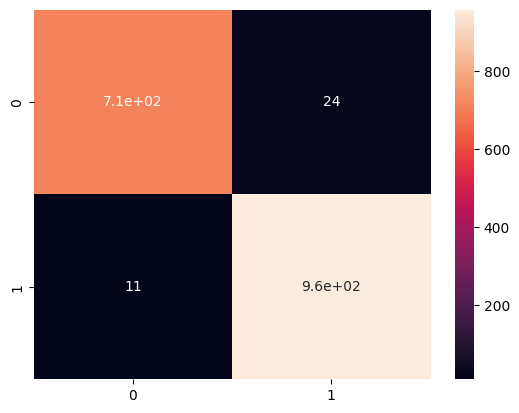

In [27]:
import seaborn as sn
c_matrix = metrics.confusion_matrix(test_y, test_ds_predicted)
sn.heatmap(c_matrix, annot=True)

In [28]:
print(test_x)

  (0, 46)	1
  (0, 142)	1
  (0, 917)	1
  (0, 105)	1
  (1, 142)	1
  (1, 917)	1
  (1, 105)	1
  (1, 373)	1
  (1, 376)	1
  (1, 374)	1
  (2, 363)	1
  (2, 399)	1
  (2, 317)	1
  (2, 229)	1
  (3, 80)	1
  (3, 404)	1
  (3, 922)	1
  (3, 46)	1
  (4, 142)	1
  (4, 917)	1
  (4, 105)	1
  (4, 777)	1
  (5, 46)	1
  (5, 142)	1
  (5, 917)	1
  :	:
  (1697, 373)	1
  (1697, 670)	1
  (1697, 757)	1
  (1697, 74)	1
  (1698, 407)	1
  (1698, 56)	1
  (1698, 363)	1
  (1698, 399)	1
  (1698, 317)	1
  (1698, 348)	1
  (1698, 418)	1
  (1698, 610)	1
  (1698, 701)	1
  (1699, 142)	1
  (1699, 917)	1
  (1699, 105)	1
  (1699, 373)	1
  (1699, 477)	1
  (1699, 409)	1
  (1699, 348)	1
  (1699, 973)	1
  (1700, 46)	1
  (1700, 142)	1
  (1700, 917)	1
  (1700, 105)	1


In [29]:
import pickle
filename='sentiment_classification.sav'
pickle.dump(nb_clf,open(filename,'wb'))

In [30]:
sentiment_model=pickle.load(open('sentiment_classification.sav','rb'))

In [31]:
text=["the overall experience during my whole trip was very good and it must be taken care of by the required authorities"]
text=count_vectorizer.transform(text)
y=sentiment_model.predict(text)
print(y)

[1]


In [32]:
def sentiment_predict(text):
    array=[str(text)]
    sentiment_model=pickle.load(open('sentiment_classification.sav','rb'))
    array=count_vectorizer.transform(array)
    y=sentiment_model.predict(array)
    return y

In [33]:
text=str(input())
print(pos_tagging(text))
print(label_texts(text))
print(sentiment_predict(text))

[{'india': 'NN'}, {'match': 'NN'}, {'zimbabwe': 'NN'}]
(india,)
[{'india': 'GPE'}]
[1]


In [34]:
text=str(input())
print(text)
print(pos_tagging(text))
print(label_texts(text))
print(sentiment_predict(text))

india is a developing nation
[{'india': 'NN'}, {'developing': 'VBG'}, {'nation': 'NN'}]
(india,)
[{'india': 'GPE'}]
[1]


In [35]:
text=str(input())
print(text)
print("Parts of speech in the text:"+pos_tagging(text))
print("Labels:"+label_texts(text))
print("Sentiment of the text:" +sentiment_predict(text))

it was a wonderful experience at JW Marriot


TypeError: can only concatenate str (not "list") to str

In [36]:
text=str(input())
print(text)
print("Parts of speech in the text:")
print(pos_tagging(text))
print("Labels:")
print(label_texts(text))
print("Sentiment of the text:" +sentiment_predict(text))

it was a wonderful experience at JW Marriot
Parts of speech in the text:
[{'wonderful': 'NN'}, {'experience': 'NN'}, {'JW': 'NN'}, {'Marriot': 'NN'}]
Labels:
(JW Marriot,)
[{'JW Marriot': 'ORG'}]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U22'), dtype('int64')) -> None

In [37]:
def label_texts(text):
    labels=[]
    nlp=spacy.load('en_core_web_sm')
    doc=nlp(text)
    for ent in doc.ents:
        labels.append({ent.text:ent.label_})
    return labels

In [38]:
text=str(input())
print(text)
print("Parts of speech in the text:")
print(pos_tagging(text))
print("Labels:")
print(label_texts(text))
print("Sentiment of the text:")
print(sentiment_predict(text))

It was a bad experience visiting Agra.
Parts of speech in the text:
[{'It': 'PRP'}, {'bad': 'JJ'}, {'experience': 'NN'}, {'visiting': 'VBG'}, {'Agra': 'NN'}, {'.': '.'}]
Labels:
[{'Agra': 'PERSON'}]
Sentiment of the text:
[0]


In [39]:
text=str(input())
print(text)
print("Parts of speech in the text:")
print(pos_tagging(text))
print("Labels:")
print(label_texts(text))
print("Sentiment of the text:")
print(sentiment_predict(text))

Sachin Tendulkar was a great batsman who played for India.
Parts of speech in the text:
[{'Sachin': 'NN'}, {'Tendulkar': 'NN'}, {'great': 'JJ'}, {'batsman': 'NN'}, {'played': 'NNS'}, {'India': 'NNP'}, {'.': '.'}]
Labels:
[{'Sachin Tendulkar': 'PERSON'}, {'India': 'GPE'}]
Sentiment of the text:
[1]
